In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [116]:
# Uploading the data
data = pd.read_csv("ifood_df.csv")

# Creating a copy to manipulate freely
df = data.copy()

In [117]:
# Checking the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [118]:
# Double checking if we have any null data
df.isnull().sum().sample(5)

MntFruits              0
AcceptedCmp1           0
marital_Together       0
NumCatalogPurchases    0
NumWebPurchases        0
dtype: int64

In [119]:
# Getting a view of a random sample
df.sample(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1063,40479.0,1,0,95,5,0,8,2,0,0,...,1,0,0,0,1,0,0,15,15,0
897,84169.0,0,0,9,1478,19,403,0,19,0,...,0,0,0,0,0,0,1,1919,1919,2
1336,62159.0,0,0,68,182,17,259,77,70,29,...,0,0,0,0,0,0,1,605,576,0
1509,23331.0,1,0,92,5,36,7,0,10,45,...,0,0,1,0,0,0,0,58,13,0
403,37401.0,1,0,14,19,3,19,3,1,3,...,0,0,0,0,0,0,1,45,42,0


In [120]:
# Some Data Cleaning: Creating categorical variables that we'll be needing in our analysis

#Education Groups
df["Education_level"] = pd.from_dummies(df[["education_2n Cycle","education_Graduation", "education_Master", "education_Basic","education_PhD"]], sep="education_")

#Income Groups
bins = np.linspace(min(df['Income']), max(df['Income']), 4)

groupNames = ["Low", "Med", "High"]

df['Income_group'] = pd.cut(df['Income'], bins, labels = groupNames, include_lowest = True)

#Marital Status
df["Marital_status"] = pd.from_dummies(df[["marital_Married","marital_Divorced", "marital_Single", "marital_Together","marital_Widow"]], sep="marital_")


<Axes: xlabel='Income_group', ylabel='MntTotal'>

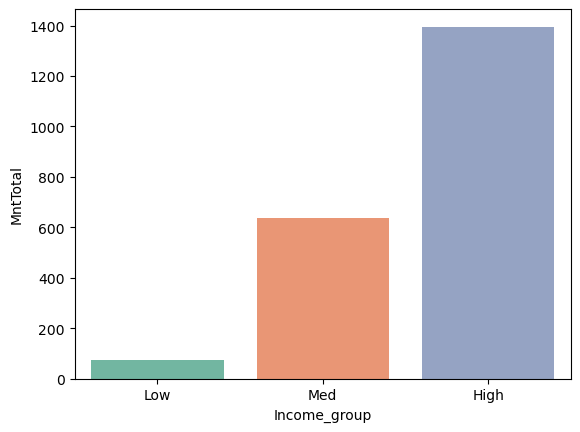

In [121]:
# Question: How does the amount spent on different food categories (sweets, meat, fish, fruits) vary among different income groups?
# Plotting the average total spending per income group

income_mnt = df.pivot_table(index="Income_group", values="MntTotal", aggfunc="mean", observed=False)

sns.barplot(x="Income_group", y="MntTotal", data=income_mnt, palette="Set2", hue="Income_group")

In [122]:
# How does the amount spent on different food categories (sweets, meat, fish, fruits) vary among different income groups?
# Plotting a scatter plot with the regression line. I am using plotly here because for me it is the shortest way of getting a scatter plot with a non-linear regression line.
# Another perk of using plotly is that accessing the index of the outliers is much easier:

figure = px.scatter(df,
                 x="Income",
                 y="MntTotal",
                 trendline="ols",
                 trendline_options=dict(log_y=True, log_x=True), 
                 title="Log-transformed fit",
                 labels={
                    "Income": "Income",
                    "MntTotal": "Total Spending Amount"},
                  hover_data={'index': (df.index)}
                 )
figure.show()


In [123]:
# Checing the outliers:
df.iloc[20:21,:]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Education_level,Income_group,Marital_status
20,2447.0,1,0,42,1,1,1725,1,1,1,...,0,1,0,0,1729,1728,0,Graduation,Low,Married


In [124]:
# Checing the outliers:
df.iloc[1872:1873,:]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Education_level,Income_group,Marital_status
1872,113734.0,0,0,9,6,2,3,1,262,3,...,0,0,0,1,274,271,0,PhD,High,Single


In [125]:
# Checing the outliers:
df.drop(index=20, inplace=True)
df.drop(index=1872, inplace=True)

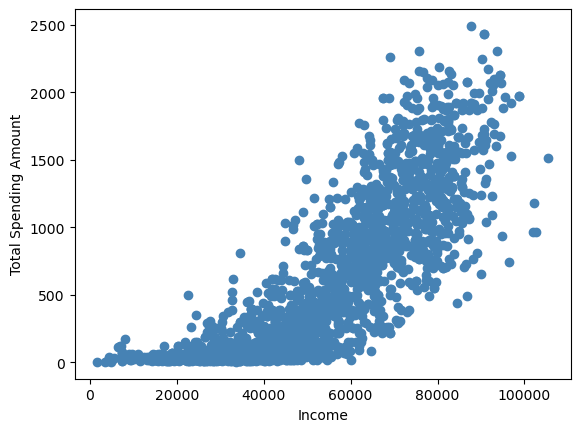

In [126]:
# To get the scatter plot only:

plt.scatter("Income", "MntTotal", data=df, color="steelblue")
plt.ylabel("Total Spending Amount")
plt.xlabel("Income")
plt.show()

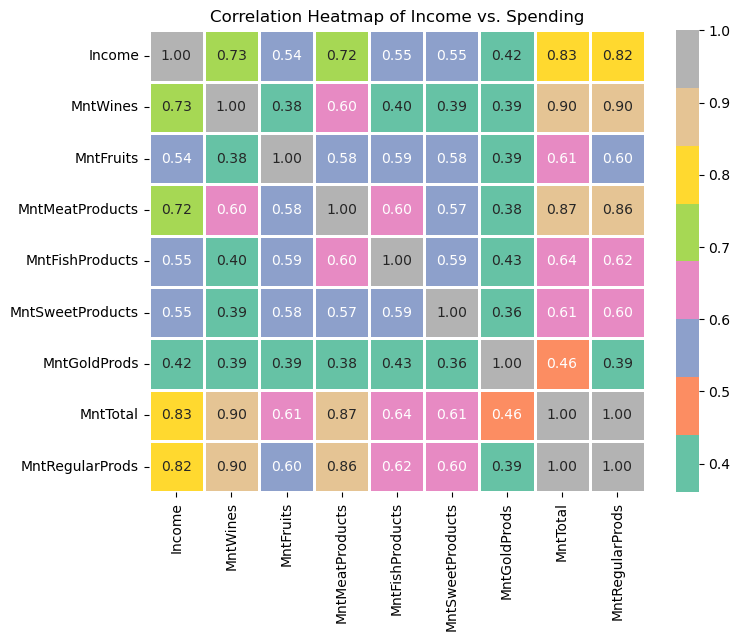

In [127]:
# How does the income influence spending of different products?
# Using a correlation heatmap:

cols = ['Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'MntTotal', 'MntRegularProds']

plt.figure(figsize=(8, 6))
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', cmap='Set2', linewidths=2)
plt.title('Correlation Heatmap of Income vs. Spending')
plt.show()

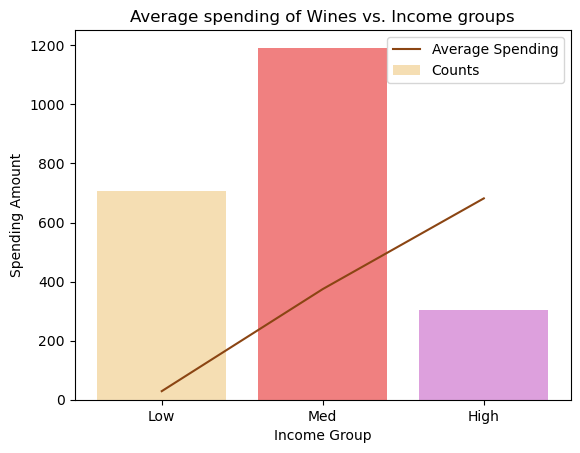

In [128]:
# How does the amount spent on different food categories (sweets, meat, fish, fruits) vary among different income groups?
# Plotting the average spending per income group
product = "MntWines"

income_mnt = df.groupby(df["Income_group"], observed=False)[product].agg(["count", "mean"])

plt.plot(income_mnt["mean"], color= "saddlebrown", label="Average Spending")
plt.bar(x=income_mnt.index,height=income_mnt["count"], color=["wheat", "lightcoral", "plum"], label="Counts")
plt.title(f'Average spending of {product.split("Mnt")[1]} vs. Income groups')
plt.xlabel("Income Group")
plt.ylabel("Spending Amount")
plt.legend()
plt.show()

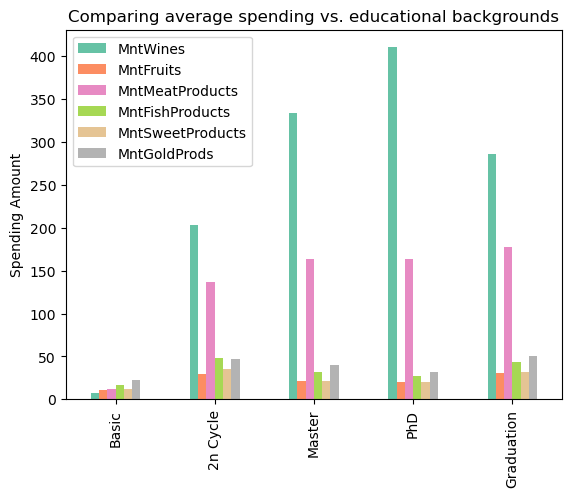

In [129]:
# How does education level influence spending on different categories of food, particularly sweets and healthy options like fruits?
# Plotting the average spending of each product type per education level:

edu_mnt = df.groupby(df["Education_level"])[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].agg("mean").sort_values(by="MntMeatProducts", ascending=True).plot(kind="bar", colormap="Set2")

plt.title("Comparing average spending vs. educational backgrounds")
plt.xlabel("")
plt.ylabel("Spending Amount")
plt.legend()
plt.show()


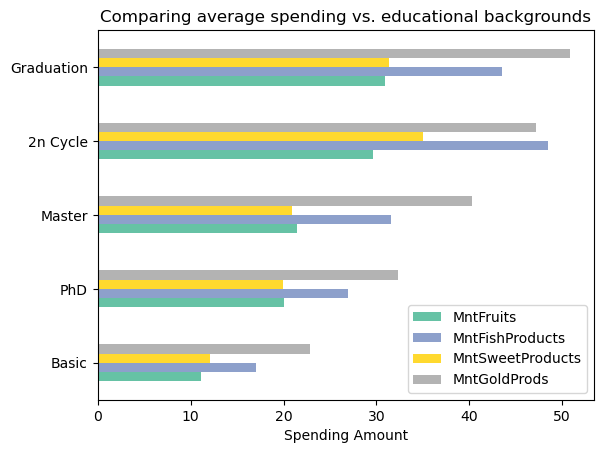

In [130]:
# How does education level influence spending on different categories of food, particularly sweets and healthy options like fruits?
# Same as above, but removed the very high spendings of Wines and Meat to get a closer look into other products' spending:

edu_mnt = df.groupby(df["Education_level"])[['MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].agg("mean").sort_values(by="MntGoldProds").plot(kind="barh", colormap="Set2")

plt.title("Comparing average spending vs. educational backgrounds")
plt.xlabel("Spending Amount")
plt.ylabel("")
plt.legend()
plt.show()


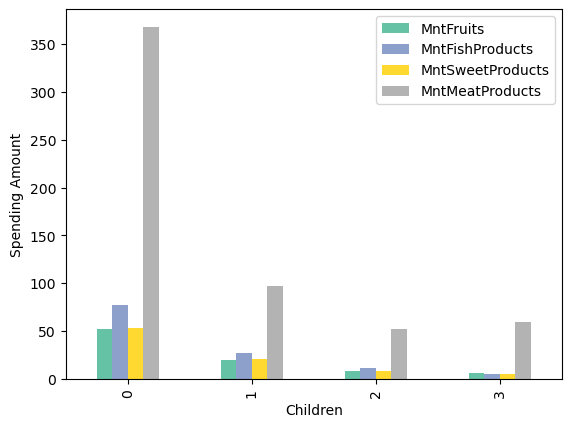

In [131]:
# How does kids number influence the spending per product type:

df["Children"] = df["Kidhome"] + df["Teenhome"]

df.groupby("Children")[['MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts']].agg("mean").plot(kind="bar", colormap="Set2")
plt.ylabel("Spending Amount")
plt.legend()
plt.show()

In [132]:
# How does education level influence spending on different categories of food, particularly sweets and healthy options like fruits?

pd.crosstab(df["Children"], df["Education_level"], margins=True)

Education_level,2n Cycle,Basic,Graduation,Master,PhD,All
Children,,,,,,
0,63,17,318,100,129,627
1,98,35,572,175,231,1111
2,34,2,199,81,99,415
3,3,0,23,8,16,50
All,198,54,1112,364,475,2203


In [133]:
# Checking the correlation betweem number of Children and Total Amount of Spending:

round(df["Children"].corr(df["MntTotal"]), 2)

-0.5

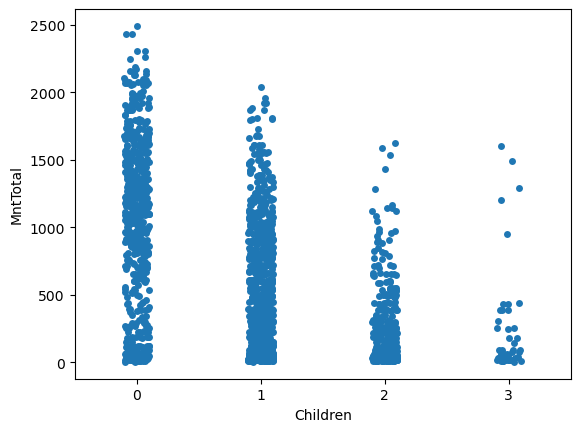

In [134]:
# Checking the variation of Total Amount of Spending according to Number of Children:

sns.stripplot(x="Children", y="MntTotal", data=df)
plt.show()

<Axes: ylabel='Marital_status'>

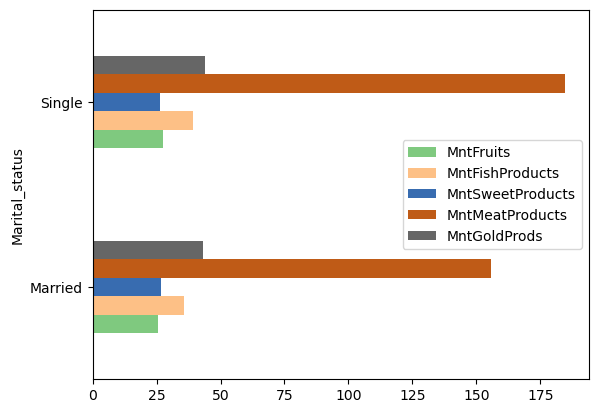

In [135]:
# How does the marital status (married vs. single) influence the spending behaviour?
df_status = pd.concat([ df[df["Marital_status"] == "Married"], df[df["Marital_status"] == "Single"] ])

df_status.groupby("Marital_status")[['MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts','MntGoldProds']].agg("mean").plot(kind="barh", colormap="Accent")

In [138]:
# Checking customers' martial status and average total spending:

df.groupby("Marital_status")['MntTotal'].agg(["mean", "count"]).sort_values(by="count", ascending=False)


,mean,count
Marital_status,,
Married,545.263775,853
Together,564.350352,568
Single,569.894958,476
Divorced,569.052174,230
Widow,672.105263,76
